<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#признаки,-недоступные-в-тестовой-выборке" data-toc-modified-id="признаки,-недоступные-в-тестовой-выборке-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>признаки, недоступные в тестовой выборке</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследовано-изменение-концентрации-элементов-на-каждом-этапе" data-toc-modified-id="Исследовано-изменение-концентрации-элементов-на-каждом-этапе-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследовано изменение концентрации элементов на каждом этапе</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Случайный лес</a></span><ul class="toc-item"><li><span><a href="#проверка-на-лучшей-модели-на-тестовой-выборке." data-toc-modified-id="проверка-на-лучшей-модели-на-тестовой-выборке.-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>проверка на лучшей модели на тестовой выборке.</a></span></li></ul></li><li><span><a href="#сравнение-с-контрастной-моделью" data-toc-modified-id="сравнение-с-контрастной-моделью-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>сравнение с контрастной моделью</a></span></li></ul></li><li><span><a href="#Вывод." data-toc-modified-id="Вывод.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод.</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

<b>Технологический процесс</b>
<br>Rougher feed — исходное сырье
<br>Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
<br>Xanthate **— ксантогенат (промотер, или активатор флотации);
<br>Sulphate — сульфат (на данном производстве сульфид натрия);
<br>Depressant — депрессант (силикат натрия).
<br>Rougher process (англ. «грубый процесс») — флотация
<br>Rougher tails — отвальные хвосты
<br>Float banks — флотационная установка
<br>Cleaner process — очистка
<br>Rougher Au — черновой концентрат золота
<br>Final Au — финальный концентрат золота

<b>Параметры этапов</b>
<br>air amount — объём воздуха
<br>fluid levels — уровень жидкости
<br>feed size — размер гранул сырья
<br>feed rate — скорость подачи

## Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, KFold, TimeSeriesSplit
from scipy import stats as st
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/datasets/gold_recovery_full_new.csv')  # — исходные данные.

In [ ]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')  # — обучающая выборка;
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')  # — тестовая выборка;

In [ ]:
def conver_date(df):
    for d in df:
        d['date'] =  pd.to_datetime(d['date'])
conver_date([data,train,test])

<img src="https://pictures.s3.yandex.net/resources/viruchka_1576238830.jpg">|

<img src="https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg">|
Формула для себя)
<br>C — доля золота в концентрате после флотации/очистки;
<br>F — доля золота в сырье/концентрате до флотации/очистки;
<br>T — доля золота в отвальных хвостах после флотации/очистки.

In [ ]:
train['recovery'] = (train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au'] - train['rougher.output.tail_au'])) / (train['rougher.input.feed_au'] * (train['rougher.output.concentrate_au'] - train['rougher.output.tail_au'])) * 100
train['recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: recovery, Length: 14149, dtype: float64

In [ ]:
train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

In [ ]:
print('MAE:',mean_absolute_error(train['rougher.output.recovery'], train['recovery']))

MAE: 9.73512347450521e-15


Совпадает.

### признаки, недоступные в тестовой выборке

In [ ]:
train_cols = train.columns
test_cols = test.columns

In [ ]:
not_in_test = train.loc[:, ~train.columns.isin(test_cols)]

In [ ]:
not_in_test.columns.sort_values().value_counts().sum()

35

Список недоступных параметров в тестовый выборке:

In [ ]:
not_in_test.columns.tolist()

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В основном это параметры продукта output, и характеристики. 34 признака исключая проверочное recovery. Можно предположить что тестовая выборка собраная уже из конечного результата где процессы уже произошли и имеется некий результат. Целевые переменные так же недоступны нам в тестовой выборке.

<br>Характеристики недоступные в тестовой выборке:
<br> 'rougher.calculation.sulfate_to_au_concentrate',
<br> 'rougher.calculation.floatbank10_sulfate_to_au_feed',
<br> 'rougher.calculation.floatbank11_sulfate_to_au_feed',
<br> 'rougher.calculation.au_pb_ratio',

<br> предполагаю что это расчетные значения элементов.

## Анализ данных

### Исследовано изменение концентрации элементов на каждом этапе

<br>rougher — флотация
<br>primary_cleaner — первичная очистка
<br>secondary_cleaner — вторичная очистка
<br>final — финальные характеристики

<br>Xanthate **— ксантогенат (промотер, или активатор флотации);
<br>Sulphate — сульфат (на данном производстве сульфид натрия);
<br>Depressant — депрессант (силикат натрия).

<br>ag  - Серебро́ 
<br>au - Зо́лото 
<br>pb - Свине́ц 
<br>sol - Cульфат натрия

In [ ]:
list_elem = {'ag':'Cеребро','au':'Золото','pb':'Свинец','sol':'Cульфат натрия'}

In [ ]:
element = [col for col in data.columns if 'input.feed_' in col]

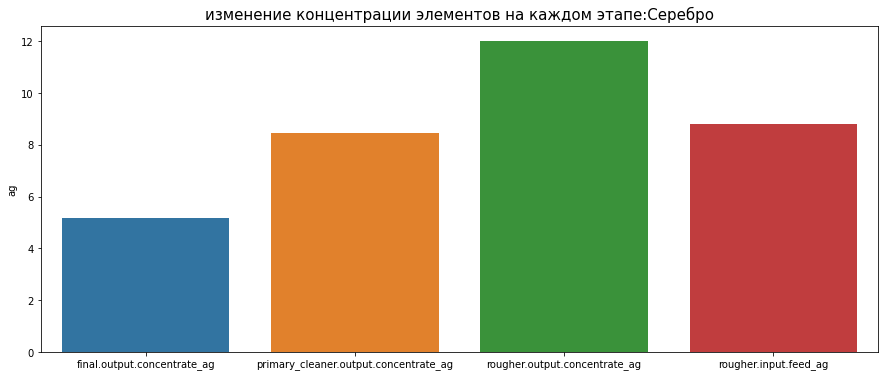

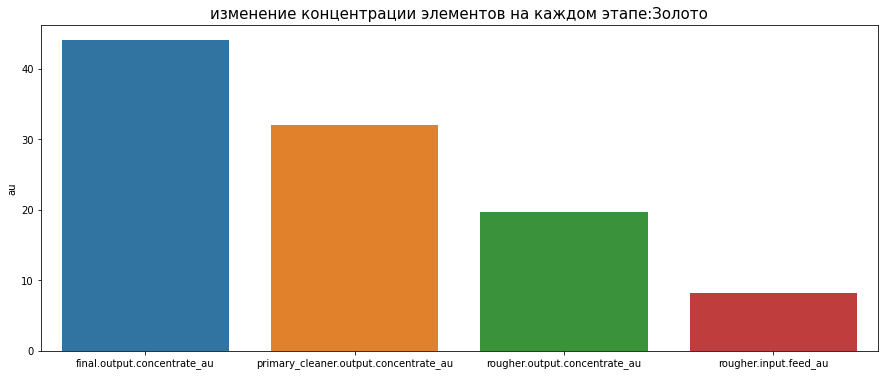

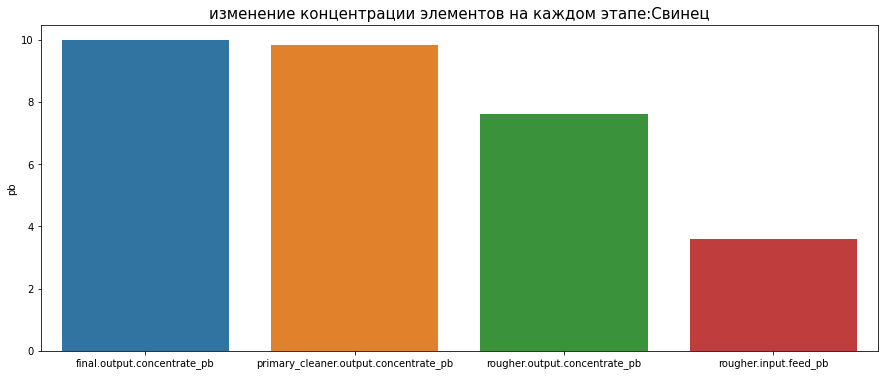

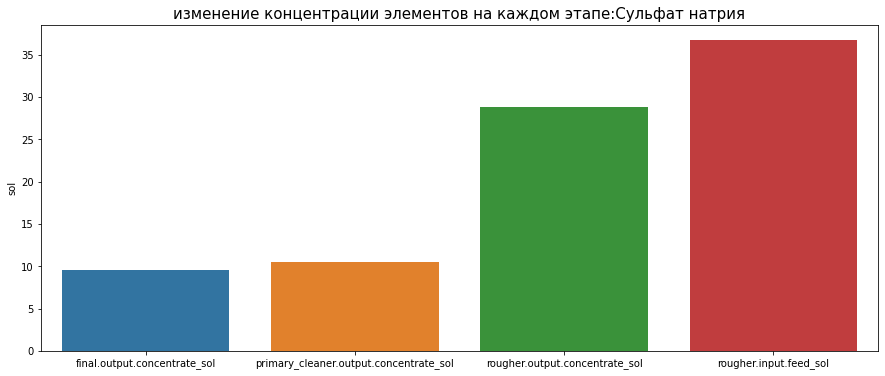

In [ ]:
for keys,val in list_elem.items():
    input_rou = [col for col in data.columns if 'input.feed_'+keys in col]
    element = [col for col in data if col.endswith('concentrate_'+keys)] + input_rou
    element = pd.DataFrame(data[element].mean()).rename(columns={0: keys})#.T
    plt.figure(figsize=(15,6))
    plt.title('изменение концентрации элементов на каждом этапе:'+val,fontsize=15)
    sns.barplot(x=element.index, y=element[keys])
    #sns.distplot(element)

На каждом из этапов золото становится больше что логично. Так же свинца становится больше, вероятно это связано с процессом очистки. Серебро и сульфат уменьшается к финальной стадии.

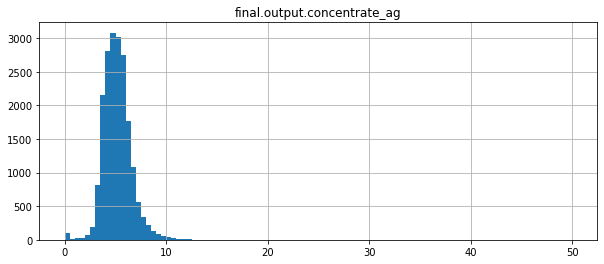

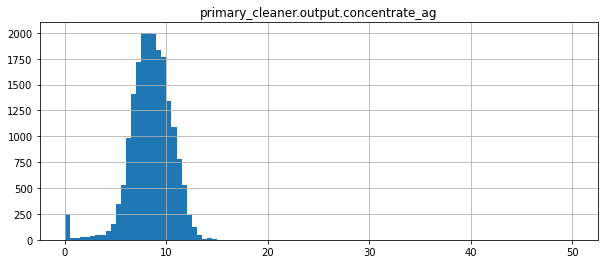

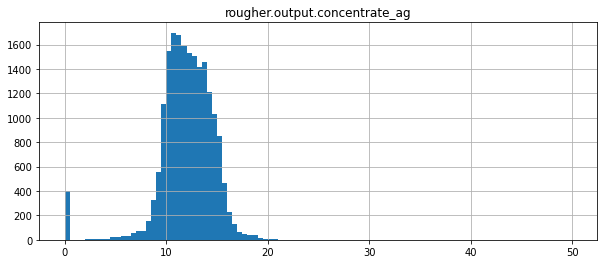

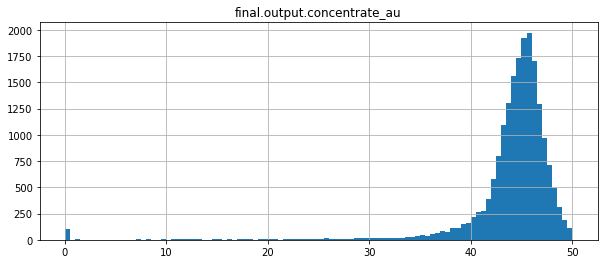

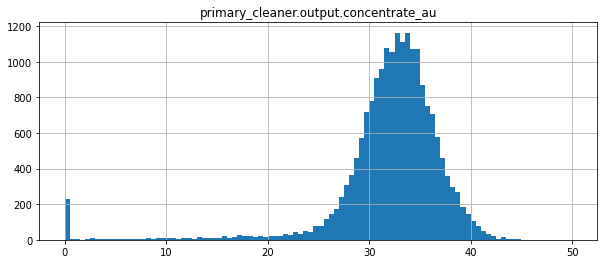

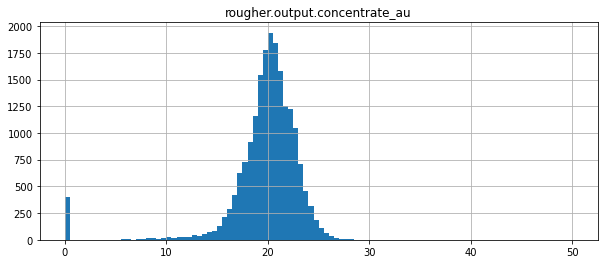

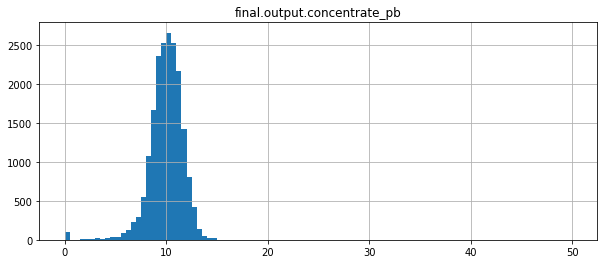

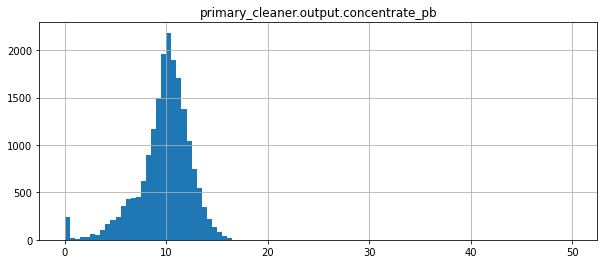

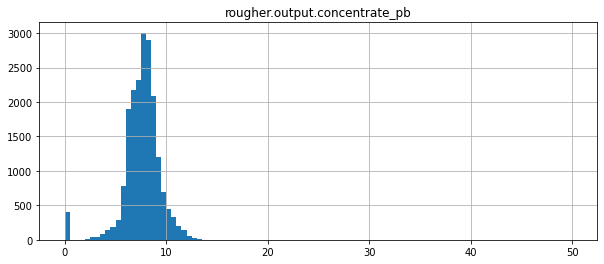

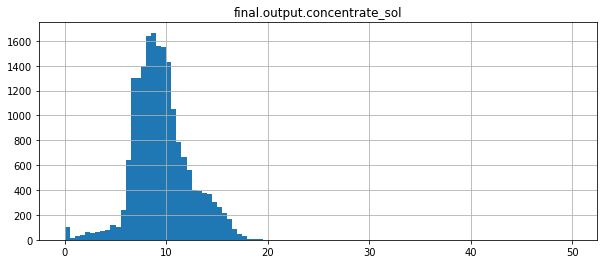

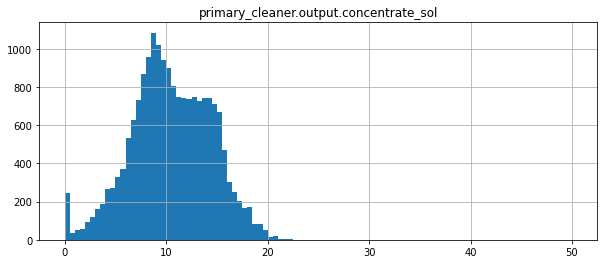

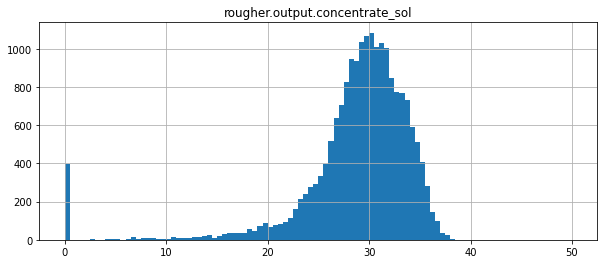

In [ ]:
for keys,val in list_elem.items(): 
    element = [col for col in data if col.endswith('concentrate_'+keys)]
    element = pd.DataFrame(data[element])
    for col in element.columns:
        plt.figure(figsize=(10,4))
        plt.title(col)
        element[col].hist(bins=100,range=(0, 50))

В финальной стадии остается больше всего свинца и золота. Есть пики в около нулей которые следует удалить.

In [ ]:
elems = []
for keys,val in list_elem.items(): 
    element = [col for col in train if col.endswith('concentrate_'+keys)]
    elems.append(element)
elems = [x for xs in elems for x in xs]

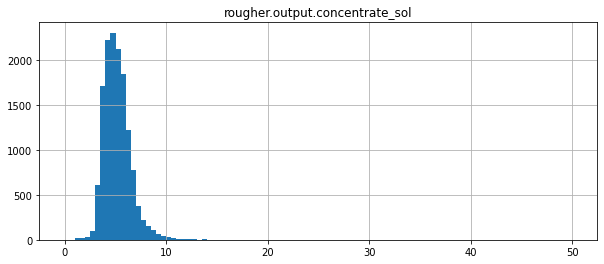

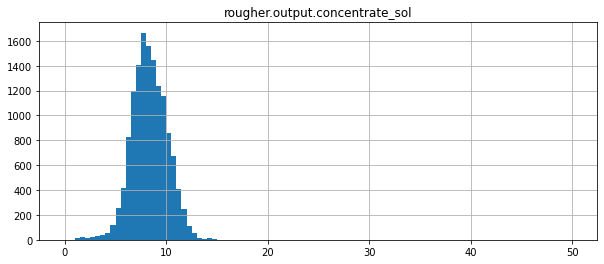

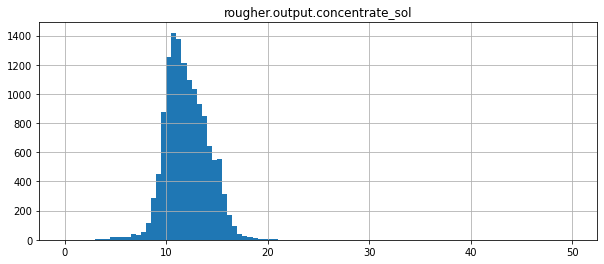

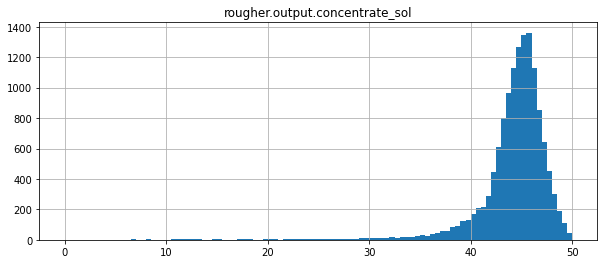

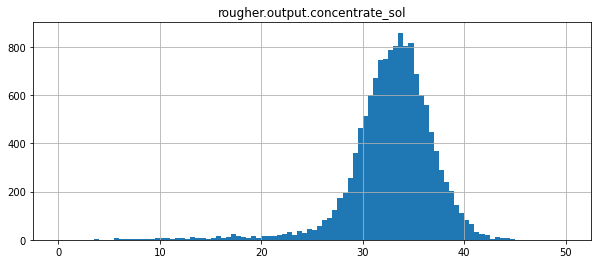

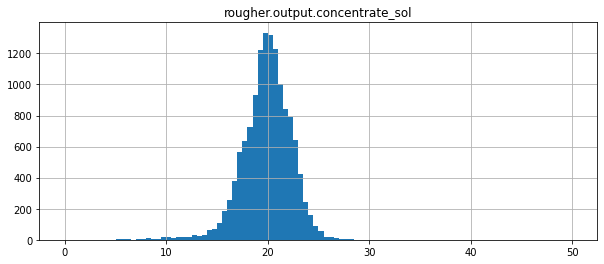

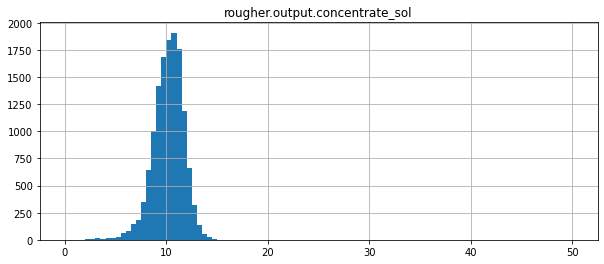

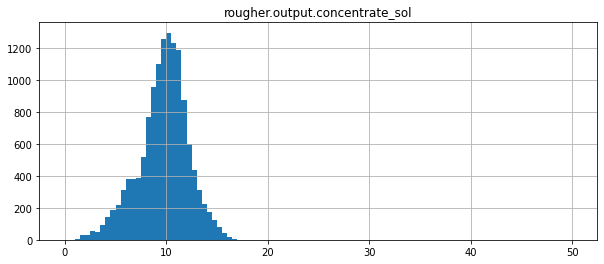

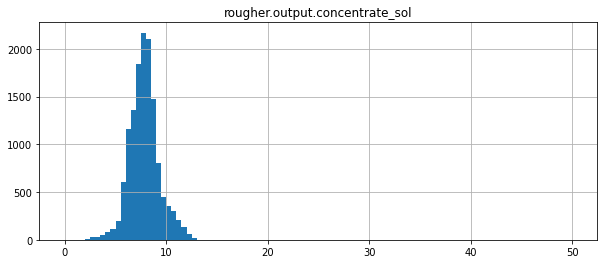

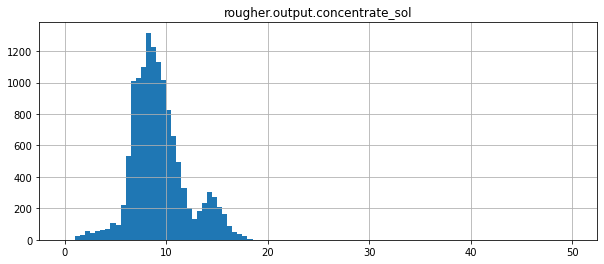

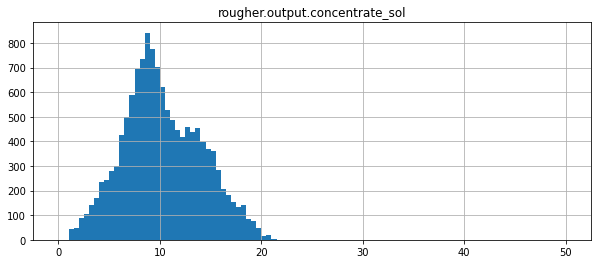

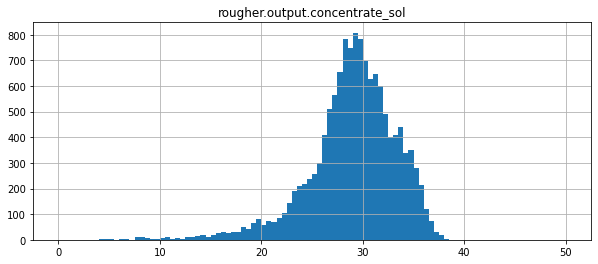

In [ ]:
for elem in elems:
    train = train.drop(train[train[elem] < 1].index,axis=0)
    plt.figure(figsize=(10,4))
    plt.title(col)
    train[elem].hist(bins=100,range=(0, 50))

Все ровно выбросов нет.

In [ ]:
size = [col for col in data if col.endswith('size')]

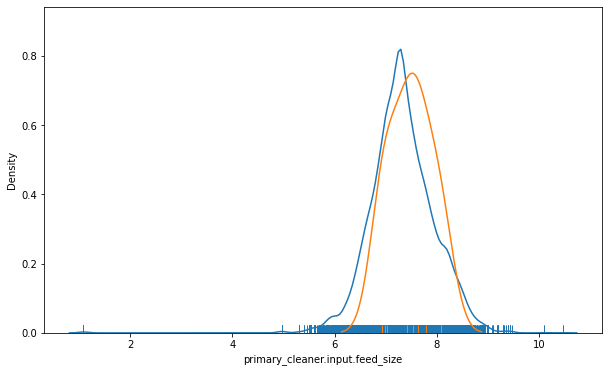

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.distplot(train[size[0]][:],hist=False, rug=True)
sns.distplot(test[size[0]][:10],hist=False, rug=True)
plt.show()

На стадии первичной очистки распределения размеров гранул практически идентичны.

<AxesSubplot:xlabel='rougher.input.feed_size', ylabel='Density'>

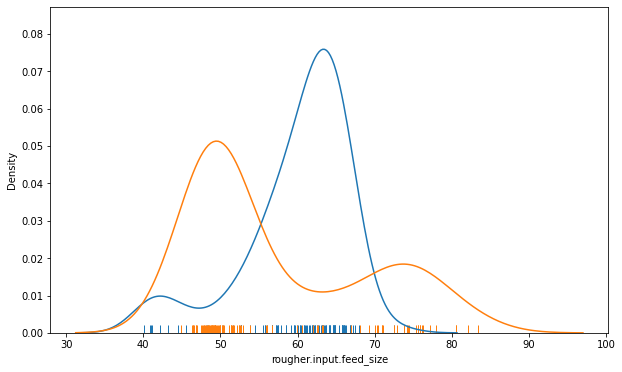

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.distplot(train[size[1]][:100], hist=False, rug=True)
sns.distplot(test[size[1]][:100], hist=False, rug=True)

На исходной стадии стадии в тестовой выборке распределенние размеров гранул сырья смещено в лево, Находится в диапазоне 40-60, в тренеровочной выборке распределение в целом можно назвать нормальным.

In [ ]:
data['Суммарная концентрация всех вещевств на стадиях.rougher.input'] = data.loc[:, ['rougher.input.feed_au',
                            'rougher.input.feed_ag',
                            'rougher.input.feed_pb',
                            'rougher.input.feed_sol']].sum(axis=1)
data['Суммарная концентрация всех вещевств на стадиях.rougher'] = data.loc[:, ['rougher.output.concentrate_au',
                            'rougher.output.concentrate_ag',
                            'rougher.output.concentrate_pb',
                            'rougher.output.concentrate_sol']].sum(axis=1)
data['Суммарная концентрация всех вещевств на стадиях.primary_cleaner'] = data.loc[:, ['primary_cleaner.output.concentrate_au',
                           'primary_cleaner.output.concentrate_ag',
                           'primary_cleaner.output.concentrate_pb',
                           'primary_cleaner.output.concentrate_sol']].sum(axis=1)
data['Суммарная концентрация всех вещевств на стадиях.final'] = data.loc[:, ['final.output.concentrate_au',
                           'final.output.concentrate_ag',
                           'final.output.concentrate_pb',
                           'final.output.concentrate_sol']].sum(axis=1)

<AxesSubplot:xlabel='Суммарная концентрация всех вещевств на стадиях.final', ylabel='Density'>

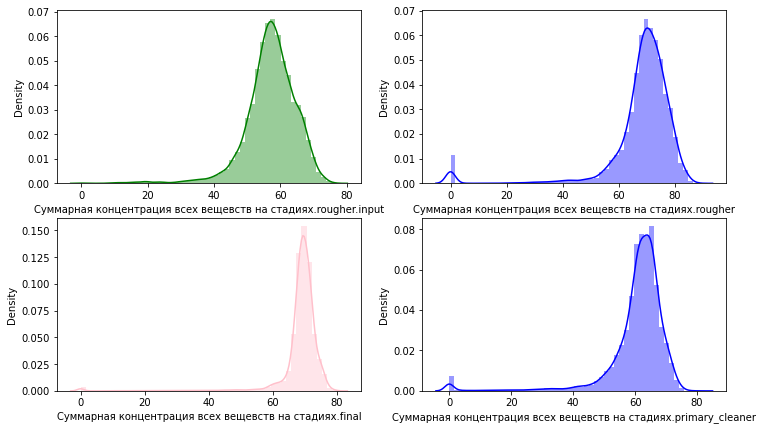

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=False)
sns.distplot(data['Суммарная концентрация всех вещевств на стадиях.rougher.input'], color="green", ax=axes[0, 0])#.set_title("rougher.input.feed")
sns.distplot(data['Суммарная концентрация всех вещевств на стадиях.primary_cleaner'], color="blue", ax=axes[1, 1])#.set_title("primary_cleaner.output.concentrate")
sns.distplot(data['Суммарная концентрация всех вещевств на стадиях.rougher'], color="blue", ax=axes[0, 1])#.set_title("rougher.output.concentrate")
sns.distplot(data['Суммарная концентрация всех вещевств на стадиях.final'], color="pink", ax=axes[1, 0])#.set_title("final.output.concentrate")

В суммарной концентрации всех вещевств так же видны пики около нуля.

### Вывод 

Данные из выборок сильно отличаются по колличеству данных но общая картина одинакова, до обработки размер гранулл находится в диапазоне от 40 до 80. После обработки размер гранул до 10. Выбросы из тренеровочной выборки убраны.

## Модель

In [ ]:
#target_rougher = 'rougher.output.recovery'
#target_final = 'final.output.recovery'

Уберём из обучающей выборки колонки которых нет в тестовой.

In [ ]:
not_in_test_remove = not_in_test.columns.tolist()
not_in_test_remove.remove('rougher.output.recovery')
not_in_test_remove.remove('final.output.recovery')

а так же уберём дату она не имеет значения.

In [ ]:
for remove in not_in_test_remove:
    train = train.drop(remove,axis=1)
train = train.drop('date',axis=1)
#test = test.drop('date',axis=1)

Заполним пропуски в данных ближайшими значениями.

In [ ]:
for data in (train, test, data):
    data.fillna(method='ffill', inplace=True)

Строим функции

In [ ]:
def sMAPE(target,predict):
    smape = 100/len(target)*np.sum((2*np.abs(predict-target)/(np.abs(target)+np.abs(predict))))
    return smape

In [ ]:
def end_smape(smape_rougher, smape_final):
    final_smape = (smape_rougher * 0.25) + (smape_final * 0.75)
    return final_smape

In [ ]:
# def get_cv_scores(model, target, features):
#     my_scorer = make_scorer(sMAPE,greater_is_better=False)    
#     scores = cross_val_score(model,features,target,cv=5,scoring=my_scorer)
#     return scores.mean()

In [ ]:
#my_scorer = make_scorer(sMAPE,greater_is_better=True)

In [ ]:
#фьюч тренеровочной
feature = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

#таргеты тренеровочной
target_rougher = train['rougher.output.recovery']
target_final = train['final.output.recovery']

Присоеденим таргеты к тестовой выборке.

In [ ]:
test = test.merge(data[['rougher.output.recovery', 'final.output.recovery','date']], on='date')
test = test.drop('date',axis=1)

In [ ]:
#фьюч тестовой
test_feature = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
#таргеты тестовой
test_target_rougher = test['rougher.output.recovery']
test_target_final = test['final.output.recovery']

### Линейная регрессия

In [ ]:
def linear(feature,target,test_target):
    model = LinearRegression()
    #model.fit(feature, target)
    #recovery_predicted = model.predict(test_feature)
    
    my_scorer = make_scorer(sMAPE,greater_is_better=False)
    scores = cross_val_score(model, feature, target, cv=5,scoring=my_scorer) 
    final_score = pd.Series(scores).mean()
    
    #smape = get_cv_scores(model, target, feature) #sMAPE(test_target,recovery_predicted),
    return [model,final_score]

In [ ]:
rougher = linear(feature,target_rougher,test_target_rougher)[1]
final = linear(feature,target_final,test_target_final)[1]

In [ ]:
end_smape(rougher,final)*-1

10.089253813875892

### Дерево решений

In [ ]:
def DecisionTree(feature,target,test_target):
    d = defaultdict(list)
    for depth in range(2, 16):
        model = DecisionTreeRegressor(max_depth=depth, random_state=12345)

        my_scorer = make_scorer(sMAPE,greater_is_better=False)
        scores = cross_val_score(model, feature, target, cv=5,scoring=my_scorer) 
        final_score = pd.Series(scores).mean()
        
        d['depth'].append(depth)
        d['final_score'].append(final_score)
    df = pd.DataFrame(d).sort_values(by='final_score')
    return df #[final_score,sMAPE(test_target,recovery_predicted)]

In [ ]:
rougher = DecisionTree(feature,target_rougher,test_target_rougher)
final = DecisionTree(feature,target_final,test_target_final)

In [ ]:
end_smape(rougher['final_score'].iloc[0],final['final_score'].iloc[-1])*-1

9.338303830614823

### Случайный лес

In [ ]:
def RandomForest(feature,target):
    d = defaultdict(list)
    for depth in range(2,10):
        for estim in range(1, 20):
            model = RandomForestRegressor(max_depth=depth,n_estimators=estim, random_state=12345)


            my_scorer = make_scorer(sMAPE,greater_is_better=False)
            scores = cross_val_score(model, feature, target, cv=5, scoring=my_scorer) 
            final_score = pd.Series(scores).mean()

            d['estim'].append(estim)
            d['final_score'].append(final_score)
            d['depth'].append(depth)

    df = pd.DataFrame(d).sort_values(by='final_score')
    return df

In [ ]:
rougher = RandomForest(feature,target_rougher)
final = RandomForest(feature,target_final)

In [ ]:
end_smape(rougher['final_score'].iloc[-1],final['final_score'].iloc[-1])*-1

8.27932852987632

#### проверка на лучшей модели на тестовой выборке.

In [ ]:
def RandomForestTest(feature,target,test_feature,test_target):
    from collections import defaultdict
    test_dict = defaultdict(list)

    model = RandomForestRegressor(max_depth=3, n_estimators=18, random_state=12345)
    
    model.fit(feature, target)
    
    recovery_predicted = model.predict(test_feature)

    test_dict['smape'].append(sMAPE(test_target, recovery_predicted))

    df = pd.DataFrame(test_dict)
    return df

In [ ]:
rougher = RandomForestTest(feature,target_rougher,test_feature,test_target_rougher)
final = RandomForestTest(feature,target_final,test_feature,test_target_final)

In [ ]:
end_smape(rougher['smape'][0],final['smape'][0])

9.385847485937264

### сравнение с контрастной моделью

In [ ]:
def dummy(feature, target,test_feature):
    dummy_r = DummyRegressor(strategy='mean')
    dummy_r.fit(feature, target)
    predict_test = dummy_r.predict(test_feature)
    return predict_test

In [ ]:
rougher = dummy(feature,target_rougher,test_feature)
final = dummy(feature,target_final,test_feature)

In [ ]:
rougher_smape_dummy = sMAPE(test_target_rougher,rougher)

In [ ]:
final_smape_dummy = sMAPE(test_target_final,final)

In [ ]:
end_smape(rougher_smape_dummy,final_smape_dummy)

9.813874851296696

## Вывод.

Наилучшая модель случайный лес она показала самую низкую метрику smape, она ниже чем у контрастной модели.

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке